## Loading the data

In [704]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [705]:


# Download latest version
path = r"C:\Users\honya\Documents\GitHub\Portfolio\Customer_Churn\customer_churn_data.csv"

df = pd.read_csv(path)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [706]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## EDA

In [707]:
def eda(features):
    n = len(features)
    fig, axes = plt.subplots(n // 2, 2, figsize=(30, 40))  
    axes = axes.flatten()
    
    for i, feature in enumerate(features):
        values = df[feature].value_counts()
    
        sns.barplot(x=values.index, y=values.values, hue=values.index, ax=axes[i], palette="viridis", legend=False)

        axes[i].set_title(feature, fontsize=12)
        axes[i].set_xlabel("")
        axes[i].set_ylabel("Frequency", fontsize=10)
        axes[i].tick_params(axis='x', rotation=45)

plt.subplots_adjust(hspace=0.8, wspace=0.2) 
plt.show()

<Figure size 640x480 with 0 Axes>

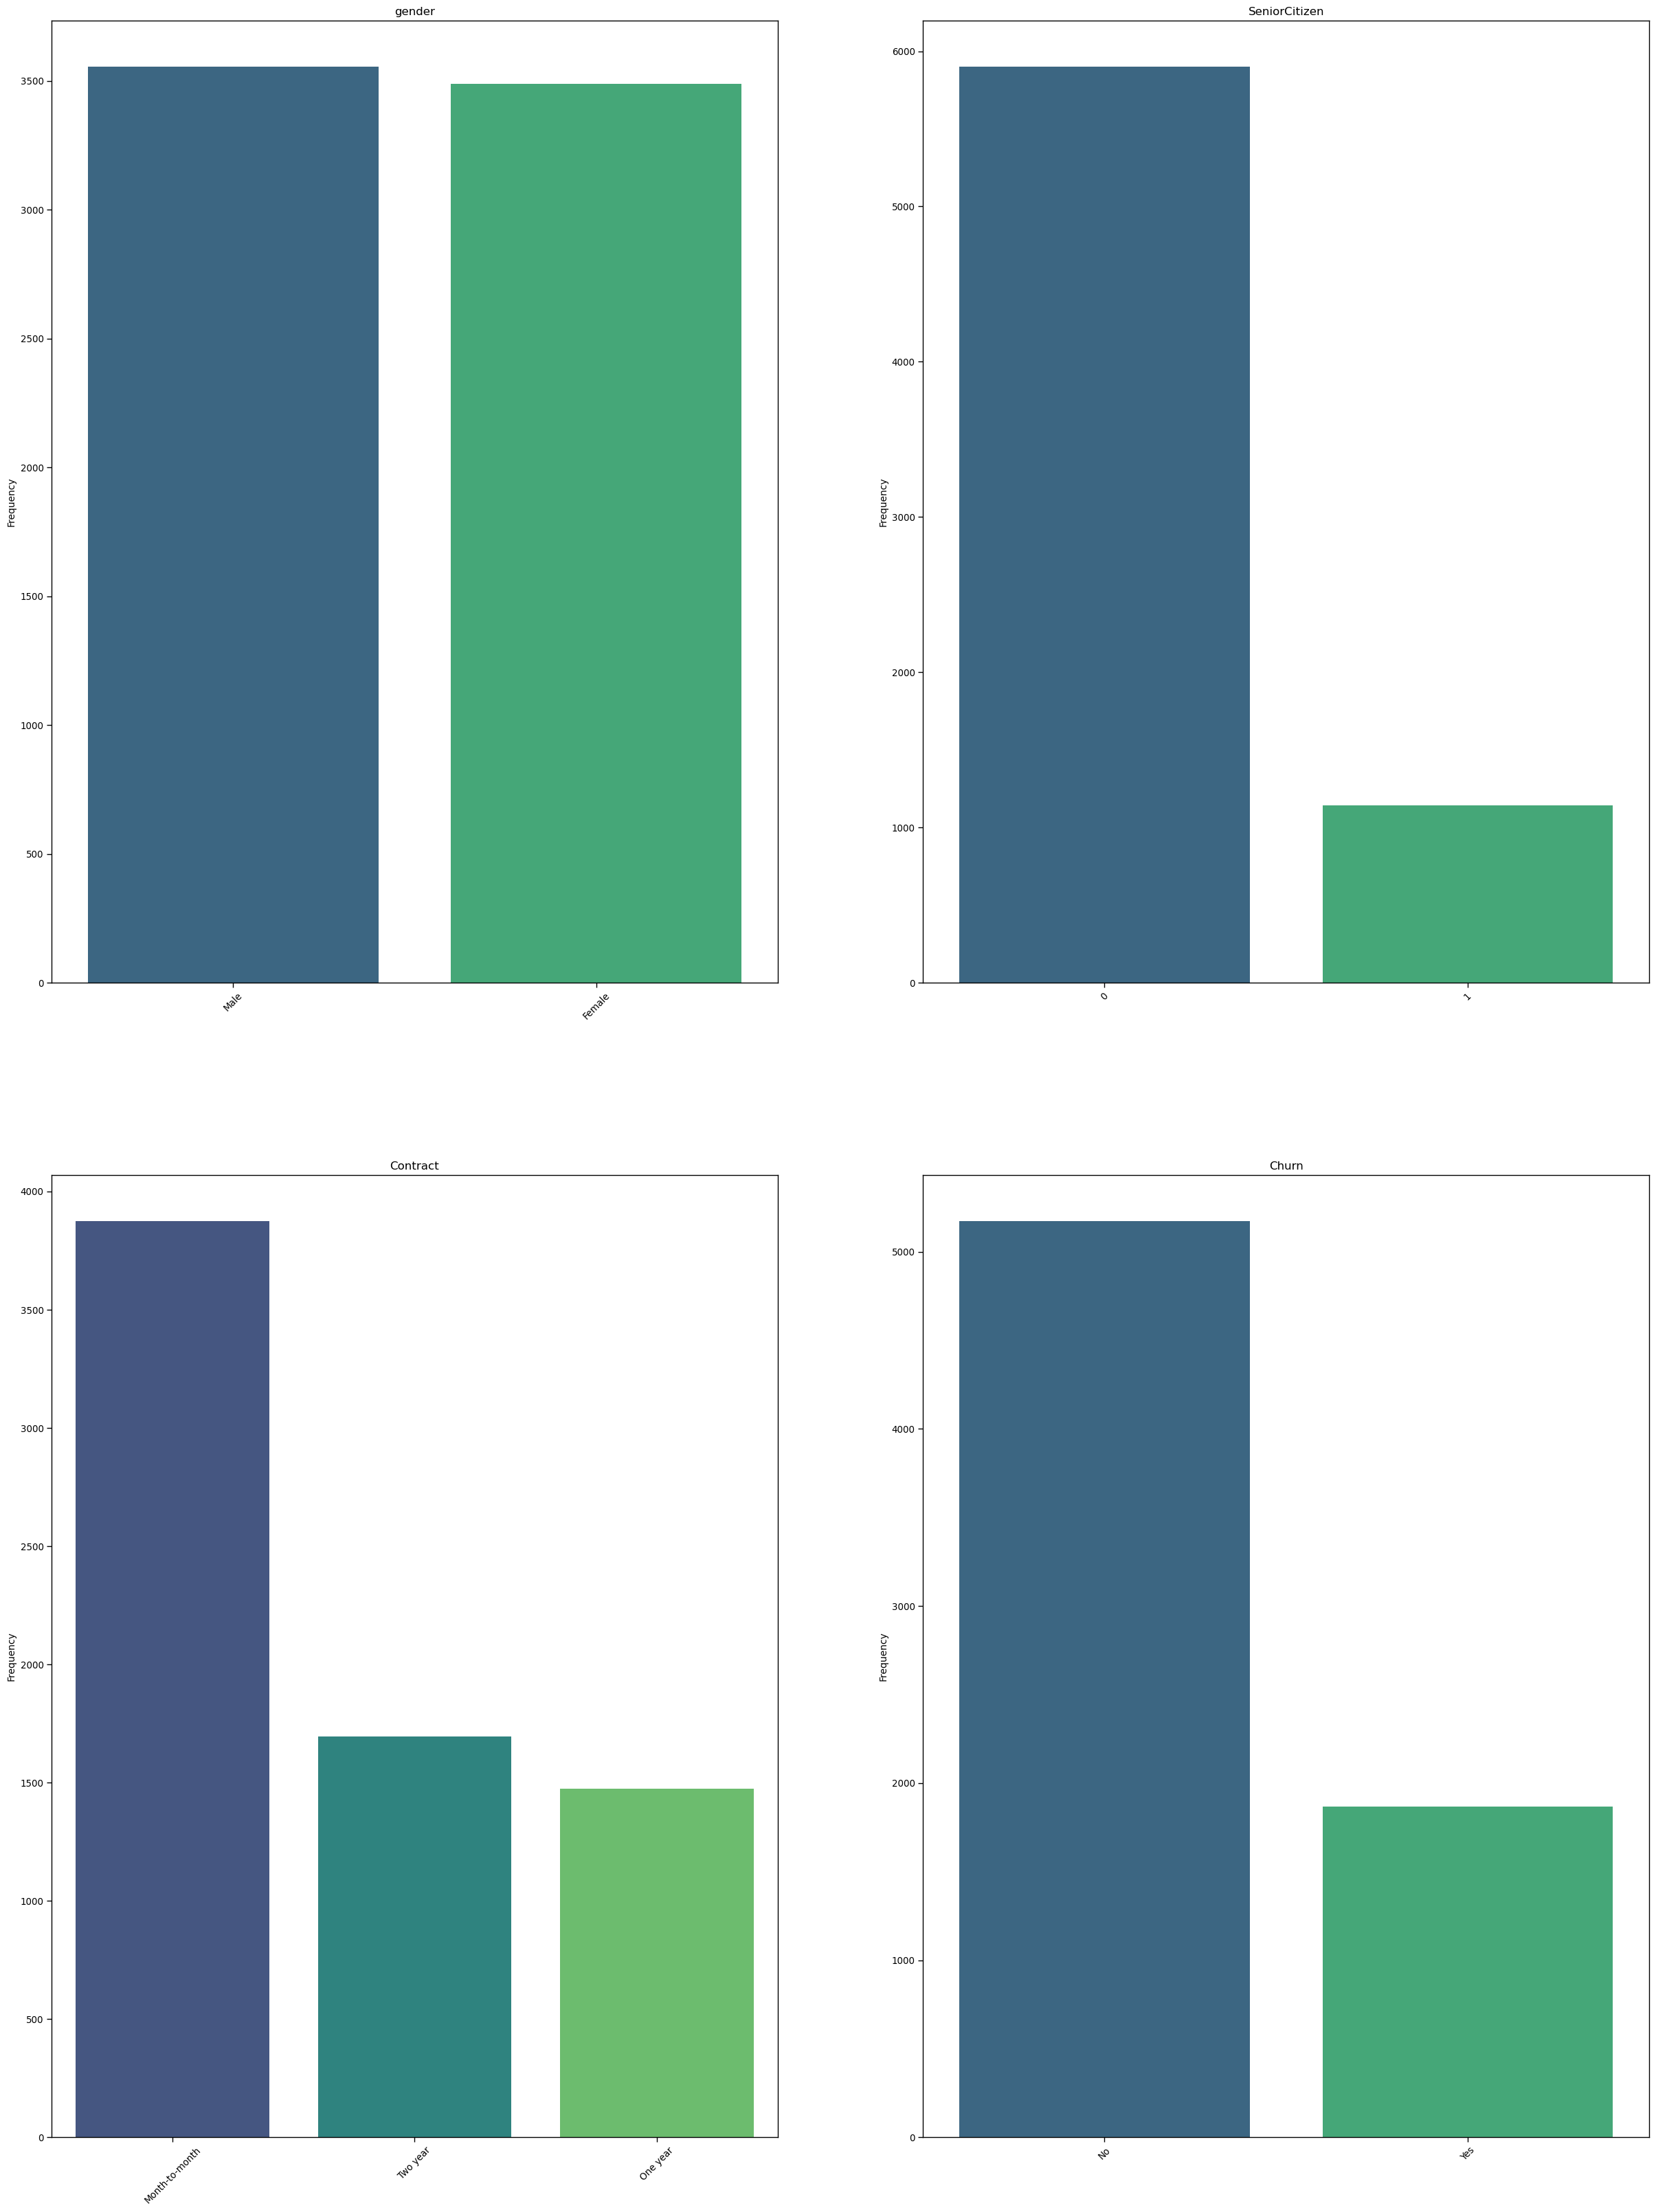

In [708]:
eda(["gender", "SeniorCitizen", "Contract", "Churn"])

In [709]:
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [710]:
values = df["PaymentMethod"].value_counts()
fig = go.Figure(data=[go.Pie(labels=values.index, values=values.values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()


Text(0.5, 1.0, 'Distribution of monthly charges by churn')

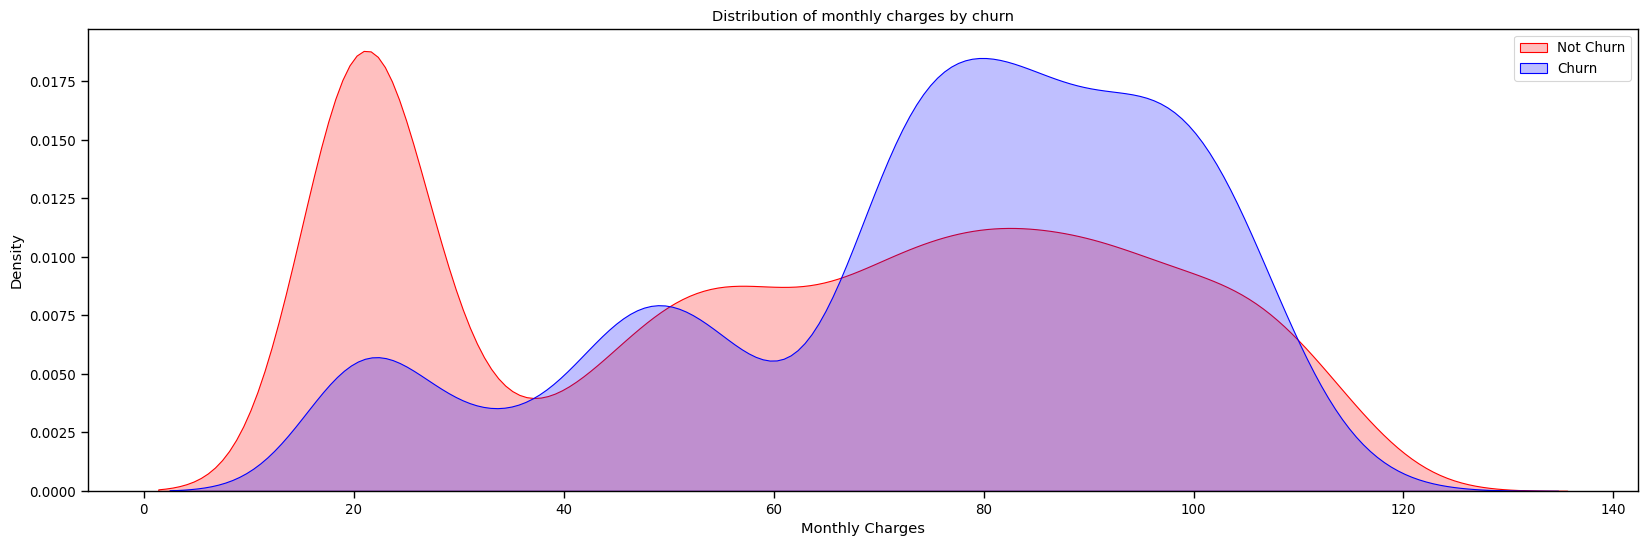

In [711]:
plt.figure(figsize=(20, 6))
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ], color="Red", fill=True)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ], ax =ax, color="Blue", fill=True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

In [712]:
metadata = df.dtypes.to_frame("data type")
metadata["missing"] = df.isnull().sum() + (df == "").sum()
metadata["missing percent"] = (df.isnull().sum() + (df == "").sum()) / df.shape[0]
metadata = metadata.reset_index(names="features")
metadata

,features,data type,missing,missing percent
0,customerID,object,0,0.0
1,gender,object,0,0.0
2,SeniorCitizen,int64,0,0.0
3,Partner,object,0,0.0
4,Dependents,object,0,0.0
5,tenure,int64,0,0.0
6,PhoneService,object,0,0.0
7,MultipleLines,object,0,0.0
8,InternetService,object,0,0.0
9,OnlineSecurity,object,0,0.0


In [713]:
df = df.drop(['customerID'], axis = 1)
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

In [714]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.fillna(df["TotalCharges"].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [715]:
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [716]:
from sklearn.preprocessing import LabelEncoder

def converter(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [717]:
df = df.apply(lambda x: converter(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [718]:
df.to_csv("final_data.csv")

In [719]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

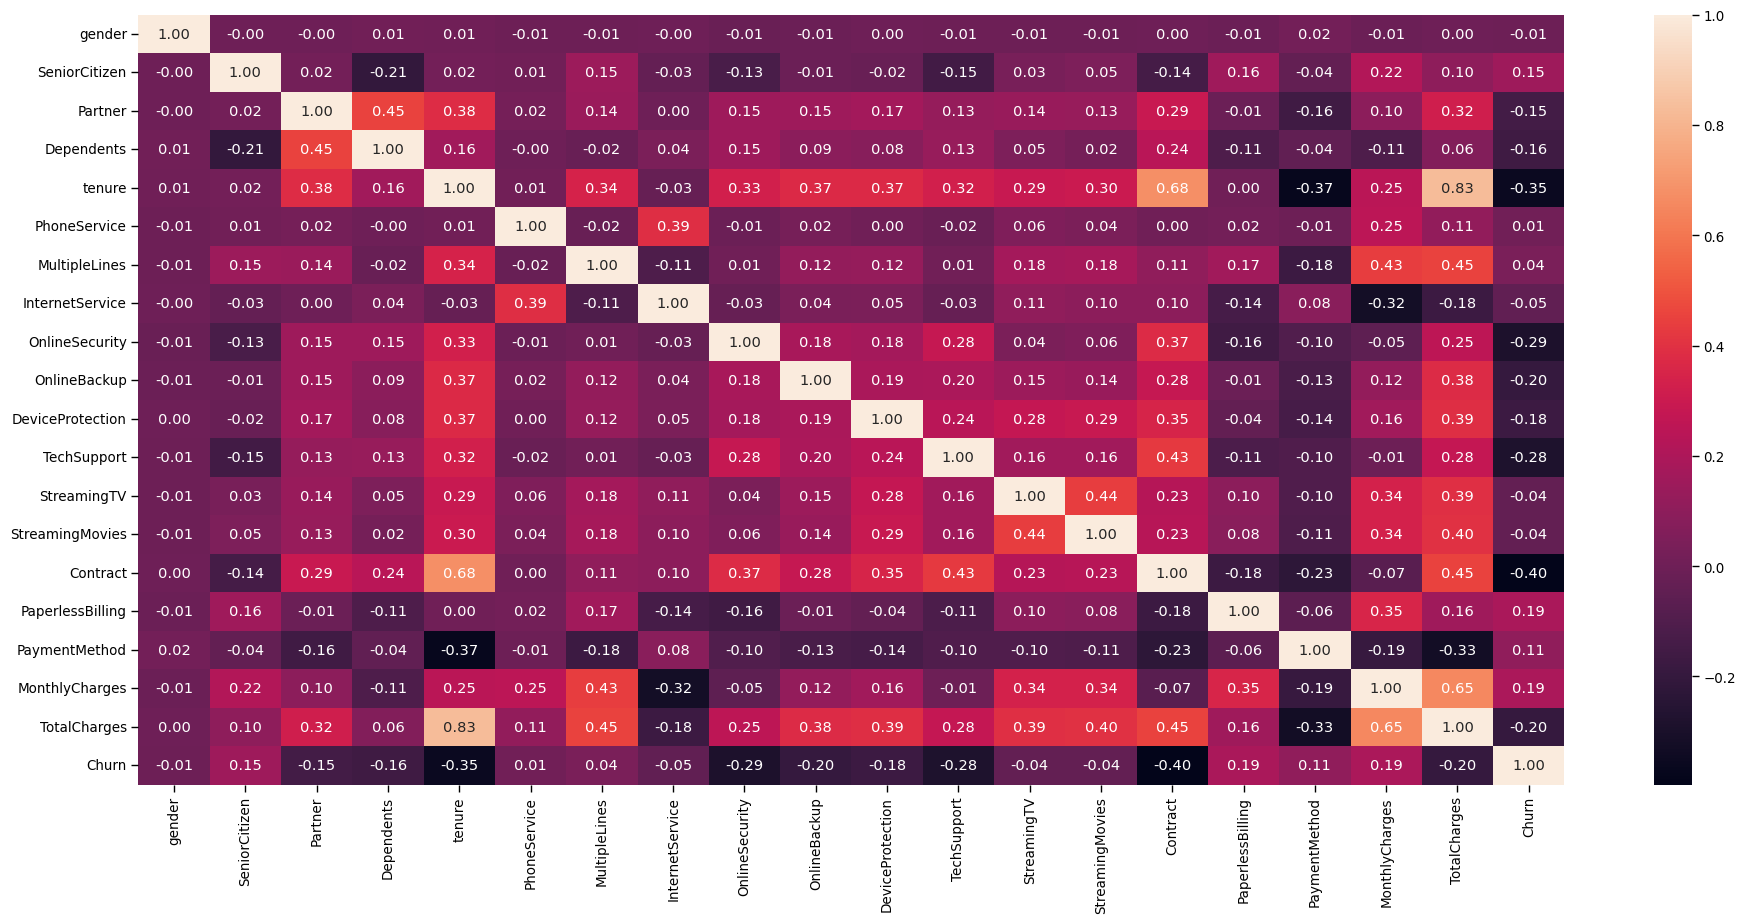

In [720]:
correlation_matrix = df.corr()
plt.figure(figsize=(23, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

In [721]:
df.corr()["Churn"].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

In [722]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [723]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42, stratify=y)

### Since these are the only features that are not binary

In [724]:
from sklearn.preprocessing import StandardScaler

num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),columns=num_cols)

In [725]:
cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] 
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe))

In [726]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## Modelling

In [727]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report, roc_auc_score

## Rnadom Forest

In [728]:
rfc = RandomForestClassifier(n_estimators=300, min_samples_split=10, min_samples_leaf=4, max_features="log2", max_depth=20, bootstrap=True)

rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

rfc_accuracy = accuracy_score(y_true=y_test, y_pred=rfc_pred)
rfc_recall = recall_score(y_true=y_test, y_pred=rfc_pred)
rfc_f1 = f1_score(y_true=y_test, y_pred=rfc_pred)
rfc_precision = precision_score(y_true=y_test, y_pred=rfc_pred)
rfc_roc_auc = roc_auc_score(y_test, rfc_pred)

accuracy_rf = [rfc_accuracy, rfc_recall, rfc_f1, rfc_precision, rfc_roc_auc]

print(f"Random Forest Accuracy: {accuracy_rf}")

Random Forest Accuracy: [0.7914691943127962, 0.47950089126559714, 0.5501022494887525, 0.645083932853717, 0.6919776890156261]


In [729]:
"""from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=20, cv=5, scoring='accuracy', 
                                   n_jobs=-1, verbose=2, random_state=42)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred))"""

'from sklearn.model_selection import RandomizedSearchCV\n\nparam_dist = {\n    \'n_estimators\': np.arange(100, 1000, 100),\n    \'max_depth\': [None, 10, 20, 30, 50],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4],\n    \'max_features\': [\'sqrt\', \'log2\'],\n    \'bootstrap\': [True, False]\n}\n\nrf = RandomForestClassifier(random_state=42)\n\nrandom_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,\n                                   n_iter=20, cv=5, scoring=\'accuracy\', \n                                   n_jobs=-1, verbose=2, random_state=42)\n\nrandom_search.fit(X_train, y_train)\n\nprint("Best Parameters:", random_search.best_params_)\n\nbest_rf = random_search.best_estimator_\ny_pred = best_rf.predict(X_test)\nprint("Tuned Model Accuracy:", accuracy_score(y_test, y_pred))'

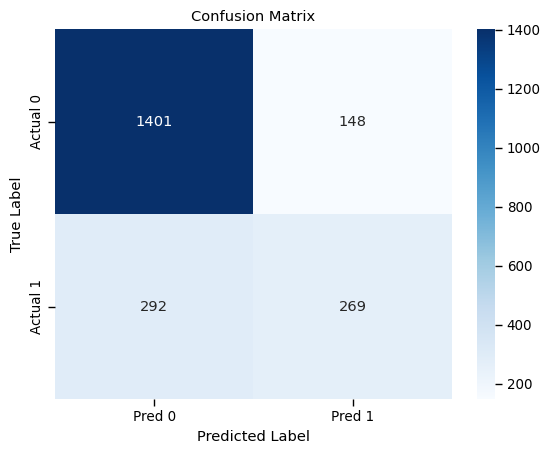

In [730]:
cm = confusion_matrix(y_test, rfc_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## KNN

In [731]:
knn = KNeighborsClassifier(metric='manhattan', n_neighbors=14, weights='uniform')
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred)
knn_roc_auc = roc_auc_score(y_test, knn_pred)

print(f"Accuracy: {knn_accuracy}")
print(f"Precision: {knn_precision}")
print(f"Recall: {knn_recall}")
print(f"F1: {knn_f1}")
print(f"RocAuc: {knn_roc_auc}")


Accuracy: 0.7767772511848341
Precision: 0.5965665236051502
Recall: 0.49554367201426025
F1: 0.5413826679649465
RocAuc: 0.6870875235474787


In [732]:
"""from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Example of parameters to search
param_grid = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create a KNN model
knn = KNeighborsClassifier()

# Grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)"""

'from sklearn.model_selection import GridSearchCV\nfrom sklearn.neighbors import KNeighborsClassifier\n\n# Example of parameters to search\nparam_grid = {\n    \'n_neighbors\': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],\n    \'weights\': [\'uniform\', \'distance\'],\n    \'metric\': [\'euclidean\', \'manhattan\']\n}\n\n# Create a KNN model\nknn = KNeighborsClassifier()\n\n# Grid search with cross-validation\ngrid_search = GridSearchCV(knn, param_grid, cv=5)\ngrid_search.fit(X_train, y_train)\n\n# Best hyperparameters\nprint("Best hyperparameters:", grid_search.best_params_)'

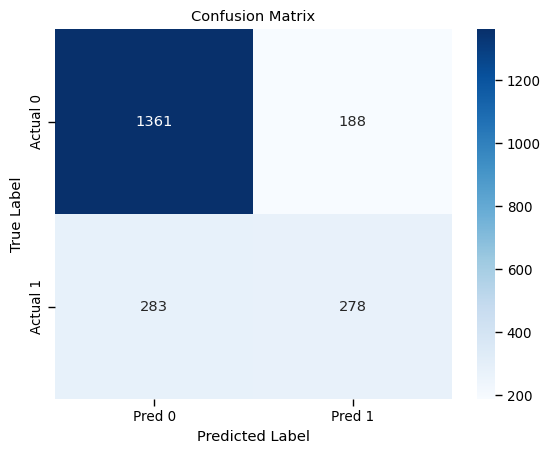

In [733]:
cm = confusion_matrix(y_test, knn_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## Logistic Regression


In [734]:
lr = LogisticRegression(solver='saga', penalty='l1', max_iter=100, C=0.23357214690901212)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_roc_auc = roc_auc_score(y_test, lr_pred)

print(f"Accuracy: {lr_accuracy}")
print(f"Precision: {lr_precision}")
print(f"Recall: {lr_recall}")
print(f"F1: {lr_f1}")
print(f"RocAuc: {lr_roc_auc}")

Accuracy: 0.8
Precision: 0.6444906444906445
Recall: 0.5525846702317291
F1: 0.5950095969289827
RocAuc: 0.7210954338892668


In [735]:
"""param_dist = {
    'C': np.logspace(-4, 4, 20),  
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 500, 1000]
}

lr = LogisticRegression(random_state=42)

random_search = RandomizedSearchCV(estimator=lr, param_distributions=param_dist,
                                   n_iter=20, cv=5, scoring='accuracy', 
                                   n_jobs=-1, verbose=2, random_state=42)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
best_lr = random_search.best_estimator_
y_pred = best_lr.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred))"""

'param_dist = {\n    \'C\': np.logspace(-4, 4, 20),  \n    \'penalty\': [\'l1\', \'l2\', \'elasticnet\', None],\n    \'solver\': [\'lbfgs\', \'liblinear\', \'saga\'],\n    \'max_iter\': [100, 500, 1000]\n}\n\nlr = LogisticRegression(random_state=42)\n\nrandom_search = RandomizedSearchCV(estimator=lr, param_distributions=param_dist,\n                                   n_iter=20, cv=5, scoring=\'accuracy\', \n                                   n_jobs=-1, verbose=2, random_state=42)\n\nrandom_search.fit(X_train, y_train)\n\nprint("Best Parameters:", random_search.best_params_)\nbest_lr = random_search.best_estimator_\ny_pred = best_lr.predict(X_test)\nprint("Tuned Model Accuracy:", accuracy_score(y_test, y_pred))'

In [736]:
ada = AdaBoostClassifier(algorithm='SAMME.R', estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=200)

ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)

ada_accuracy = accuracy_score(y_test, ada_pred)
ada_recall = recall_score(y_test, ada_pred)
ada_f1 = f1_score(y_test, ada_pred)
ada_precision = precision_score(y_test, ada_pred)
ada_roc_auc = roc_auc_score(y_test, ada_pred)

print(f"Accuracy: {ada_accuracy}")
print(f"Precision: {ada_precision}")
print(f"Recall: {ada_recall}")
print(f"F1: {ada_f1}")
print(f"RocAuc: {ada_roc_auc}")

c:\Users\honya\anaconda3\envs\block_b\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



Accuracy: 0.7928909952606635
Precision: 0.6377777777777778
Recall: 0.5115864527629234
F1: 0.5677546983184966
RocAuc: 0.7031786363233598


In [737]:
"""from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 500],  # Number of weak learners
    'learning_rate': [0.001, 0.01, 0.1, 1],  # Learning rate
    'estimator': [DecisionTreeClassifier(max_depth=1), 
                  DecisionTreeClassifier(max_depth=2), 
                  DecisionTreeClassifier(max_depth=3)],  # Weak learner complexity
    'algorithm': ['SAMME', 'SAMME.R']  # Boosting method
}

# Initialize AdaBoost classifier
ada = AdaBoostClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=ada, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit model
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_ada = grid_search.best_estimator_
y_pred = best_ada.predict(X_test)

# Print evaluation metric (accuracy)
print("Tuned AdaBoost Accuracy:", accuracy_score(y_test, y_pred))"""


'from sklearn.ensemble import AdaBoostClassifier\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.metrics import accuracy_score\n\n# Define hyperparameter grid\nparam_grid = {\n    \'n_estimators\': [50, 100, 200, 500],  # Number of weak learners\n    \'learning_rate\': [0.001, 0.01, 0.1, 1],  # Learning rate\n    \'estimator\': [DecisionTreeClassifier(max_depth=1), \n                  DecisionTreeClassifier(max_depth=2), \n                  DecisionTreeClassifier(max_depth=3)],  # Weak learner complexity\n    \'algorithm\': [\'SAMME\', \'SAMME.R\']  # Boosting method\n}\n\n# Initialize AdaBoost classifier\nada = AdaBoostClassifier(random_state=42)\n\n# Perform grid search\ngrid_search = GridSearchCV(estimator=ada, param_grid=param_grid, \n                           cv=5, scoring=\'accuracy\', n_jobs=-1, verbose=2)\n\n# Fit model\ngrid_search.fit(X_train, y_train)\n\n# Print best parameters\nprint("Best Parameters:", grid_

In [738]:
xgb = XGBClassifier(subsample=0.7, scale_pos_weight=1, n_estimators=900, min_child_weight=5, max_depth=3, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7)

xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred)
xgb_roc_auc = roc_auc_score(y_test, xgb_pred)

print(f"Accuracy: {xgb_accuracy}")
print(f"Precision: {xgb_precision}")
print(f"Recall: {xgb_recall}")
print(f"F1: {xgb_f1}")
print(f"RocAuc: {xgb_roc_auc}")

Accuracy: 0.7962085308056872
Precision: 0.6498855835240275
Recall: 0.5062388591800356
F1: 0.5691382765531062
RocAuc: 0.7037327284925357


In [739]:
"""param_dist = {
    'n_estimators': np.arange(100, 1001, 100),  
    'learning_rate': np.logspace(-3, 0, 10),  
    'max_depth': [3, 4, 5, 6, 7],  
    'min_child_weight': [1, 2, 3, 4, 5],  
    'subsample': np.arange(0.6, 1.1, 0.1),  
    'colsample_bytree': np.arange(0.6, 1.1, 0.1),  
    'gamma': np.arange(0, 0.5, 0.1),  
    'scale_pos_weight': [1, 10, 100]  
}

# Initialize XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Randomized search with 20 iterations
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist,
                                   n_iter=20, cv=5, scoring='accuracy', 
                                   n_jobs=-1, verbose=2, random_state=42)

# Fit the randomized search
random_search.fit(X_train, y_train)

# Print the best parameters found by RandomizedSearchCV
print("Best Parameters:", random_search.best_params_)

# Evaluate the best model
best_xgb = random_search.best_estimator_
y_pred = best_xgb.predict(X_test)

# Print the accuracy score
print("Tuned XGBoost Accuracy:", accuracy_score(y_test, y_pred))"""


'param_dist = {\n    \'n_estimators\': np.arange(100, 1001, 100),  \n    \'learning_rate\': np.logspace(-3, 0, 10),  \n    \'max_depth\': [3, 4, 5, 6, 7],  \n    \'min_child_weight\': [1, 2, 3, 4, 5],  \n    \'subsample\': np.arange(0.6, 1.1, 0.1),  \n    \'colsample_bytree\': np.arange(0.6, 1.1, 0.1),  \n    \'gamma\': np.arange(0, 0.5, 0.1),  \n    \'scale_pos_weight\': [1, 10, 100]  \n}\n\n# Initialize XGBoost model\nxgb_model = XGBClassifier(random_state=42)\n\n# Randomized search with 20 iterations\nrandom_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist,\n                                   n_iter=20, cv=5, scoring=\'accuracy\', \n                                   n_jobs=-1, verbose=2, random_state=42)\n\n# Fit the randomized search\nrandom_search.fit(X_train, y_train)\n\n# Print the best parameters found by RandomizedSearchCV\nprint("Best Parameters:", random_search.best_params_)\n\n# Evaluate the best model\nbest_xgb = random_search.best_estimator

In [740]:
gbc = GradientBoostingClassifier(subsample=0.7, n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=None, max_depth=5, learning_rate=0.01)
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)

gbc_accuracy = accuracy_score(y_test, gbc_pred)
gbc_recall = recall_score(y_test, gbc_pred)
gbc_f1 = f1_score(y_test, xgb_pred)
gbc_precision = precision_score(y_test, gbc_pred)
gbc_roc_auc = roc_auc_score(y_test, gbc_pred)

print(f"Accuracy: {gbc_accuracy}")
print(f"Precision: {gbc_precision}")
print(f"Recall: {gbc_recall}")
print(f"F1: {gbc_f1}")
print(f"RocAuc: {gbc_roc_auc}")



Accuracy: 0.7933649289099526
Precision: 0.656641604010025
Recall: 0.46702317290552586
F1: 0.5691382765531062
RocAuc: 0.6892895076922723


In [741]:
"""from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'n_estimators': np.arange(100, 1001, 100),  
    'learning_rate': np.logspace(-3, 0, 10),  
    'max_depth': [3, 4, 5, 6, 7],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'subsample': np.arange(0.6, 1.1, 0.1),  
    'max_features': ['sqrt', 'log2', None]  
}

gb_model = GradientBoostingClassifier(random_state=42)

random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=param_dist,
                                   n_iter=20, cv=5, scoring='accuracy', 
                                   n_jobs=-1, verbose=2, random_state=42)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

best_gb = random_search.best_estimator_
y_pred = best_gb.predict(X_test)

print("Tuned Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred))"""

'from sklearn.model_selection import RandomizedSearchCV\nimport numpy as np\n\nparam_dist = {\n    \'n_estimators\': np.arange(100, 1001, 100),  \n    \'learning_rate\': np.logspace(-3, 0, 10),  \n    \'max_depth\': [3, 4, 5, 6, 7],  \n    \'min_samples_split\': [2, 5, 10],  \n    \'min_samples_leaf\': [1, 2, 4],  \n    \'subsample\': np.arange(0.6, 1.1, 0.1),  \n    \'max_features\': [\'sqrt\', \'log2\', None]  \n}\n\ngb_model = GradientBoostingClassifier(random_state=42)\n\nrandom_search = RandomizedSearchCV(estimator=gb_model, param_distributions=param_dist,\n                                   n_iter=20, cv=5, scoring=\'accuracy\', \n                                   n_jobs=-1, verbose=2, random_state=42)\n\nrandom_search.fit(X_train, y_train)\n\nprint("Best Parameters:", random_search.best_params_)\n\nbest_gb = random_search.best_estimator_\ny_pred = best_gb.predict(X_test)\n\nprint("Tuned Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred))'

In [742]:
metrics_dict = {
    "Model": [
        "Logistic Regression", 
        "Random Forest", 
        "K-Nearest Neighbors", 
        "AdaBoost", 
        "Gradient Boosting", 
        "XGBoost"
    ],
    "Accuracy": [lr_accuracy, rfc_accuracy, knn_accuracy, ada_accuracy, gbc_accuracy, xgb_accuracy],
    "Precision": [lr_precision, rfc_precision, knn_precision, ada_precision, gbc_precision, xgb_precision],
    "Recall": [lr_recall, rfc_recall, knn_recall, ada_recall, gbc_recall, xgb_recall],
    "F1-Score": [lr_f1, rfc_f1, knn_f1, ada_f1, gbc_f1, xgb_f1],
    "ROC AUC": [lr_roc_auc, rfc_roc_auc, knn_roc_auc, ada_roc_auc, gbc_roc_auc, xgb_roc_auc]
}
metrics_df = pd.DataFrame(metrics_dict)

print(metrics_df)

                 Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
0  Logistic Regression  0.800000   0.644491  0.552585  0.595010  0.721095
1        Random Forest  0.791469   0.645084  0.479501  0.550102  0.691978
2  K-Nearest Neighbors  0.776777   0.596567  0.495544  0.541383  0.687088
3             AdaBoost  0.792891   0.637778  0.511586  0.567755  0.703179
4    Gradient Boosting  0.793365   0.656642  0.467023  0.569138  0.689290
5              XGBoost  0.796209   0.649886  0.506239  0.569138  0.703733


Logistic Regression:
  Accuracy: 0.8000
  Recall: 0.5526
  Precision: 0.6445
  F1-Score: 0.5950
  ROC AUC: 0.7211
--------------------------------------------------
Random Forest:
  Accuracy: 0.7924
  Recall: 0.4759
  Precision: 0.6496
  F1-Score: 0.5494
  ROC AUC: 0.6915
--------------------------------------------------
K-Nearest Neighbors:
  Accuracy: 0.7768
  Recall: 0.4955
  Precision: 0.5966
  F1-Score: 0.5414
  ROC AUC: 0.6871
--------------------------------------------------
AdaBoostClassifier:
  Accuracy: 0.7863
  Recall: 0.4189
  Precision: 0.6528
  F1-Score: 0.5103
  ROC AUC: 0.6691
--------------------------------------------------
Gradient Boosting Classifier:
  Accuracy: 0.7924
  Recall: 0.4724
  Precision: 0.6511
  F1-Score: 0.5475
  ROC AUC: 0.6903
--------------------------------------------------
XGBoost Classifier:
  Accuracy: 0.7962
  Recall: 0.5062
  Precision: 0.6499
  F1-Score: 0.5691
  ROC AUC: 0.7037
--------------------------------------------------


C:\Users\honya\AppData\Local\Temp\ipykernel_17192\1083879010.py:46: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



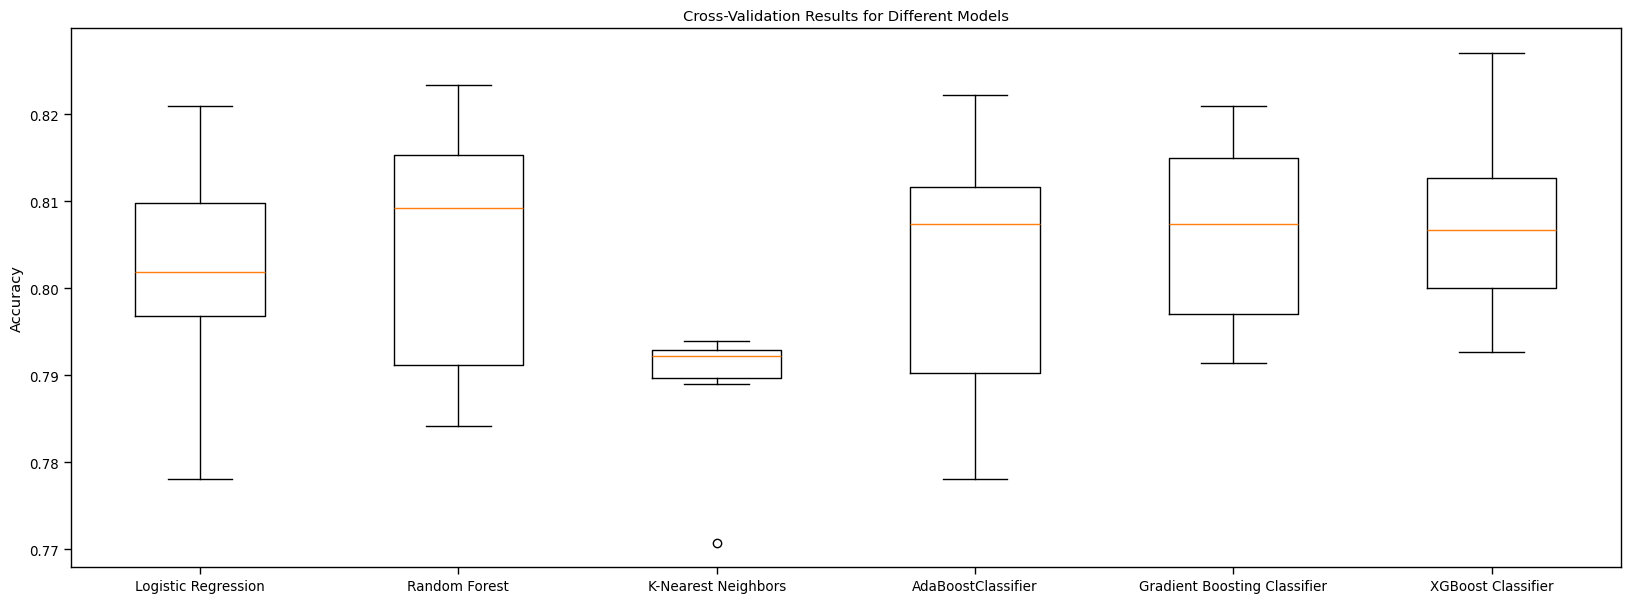

In [751]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Fit model on selected features
from sklearn.model_selection import KFold, cross_val_score

models = {
    "Logistic Regression": LogisticRegression(solver='saga', penalty='l1', max_iter=100, C=0.23357214690901212),
    "Random Forest": RandomForestClassifier(n_estimators=300, min_samples_split=10, min_samples_leaf=4, max_features="log2", max_depth=20, bootstrap=True),
    "K-Nearest Neighbors": KNeighborsClassifier(metric='manhattan', n_neighbors=14, weights='uniform'),
    "AdaBoostClassifier": AdaBoostClassifier(algorithm='SAMME', estimator=DecisionTreeClassifier(max_depth=1), learning_rate=0.1, n_estimators=200),  # Use SAMME here
    "Gradient Boosting Classifier": GradientBoostingClassifier(subsample=0.7, n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=None, max_depth=5, learning_rate=0.01),
    "XGBoost Classifier": XGBClassifier(subsample=0.7, scale_pos_weight=1, n_estimators=900, min_child_weight=5, max_depth=3, learning_rate=0.01, gamma=0.2, colsample_bytree=0.7)
}

results = []

# For each model, perform cross-validation and calculate metrics
for name, model in models.items():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kf)
    results.append(cv_results)

    # Fit the model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Print metrics for each model
    print(f"{name}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  F1-Score: {f1:.4f}")
    print(f"  ROC AUC: {roc_auc:.4f}")
    print("-" * 50)

# Create a boxplot to visualize cross-validation results
plt.figure(figsize=(20,7))
plt.boxplot(results, labels=models.keys())
plt.title("Cross-Validation Results for Different Models")
plt.ylabel("Accuracy")
plt.show()